<a href="https://colab.research.google.com/github/Cori-J/Estadistica/blob/main/NOLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <b>Por: Jhon Cori</b><br>
    <b>b.jhon.cori@gmail.com</b>
<br><br>
<b>Tema:</b>
<h1>Regresiòn no lineal con Python</h1>
</center>
<i>Creado: Marzo-2021 
    <br>
    Actualizado: Marzo-2021</i>
    <br>
    Estado: Preliminar</i>
    



La forma general de la regresion no lineal es:

\begin{equation}
y_{i} = h(x_{i}, \beta) + \epsilon_{i}
\end{equation}

Algunos modelos son intrínsecamente lineales como por ejemplo: $y = e^{x_{i}\beta_{i}+\epsilon}$, el cual es un modelo lineal despues de una transformaciòn, en este caso aplicando logaritmos neperianos.

## Supuestos del modelo de regresion no lineal

 1. **Forma funcional**
 
 La funcion de la media condicional para $y_i$ dado $x_i$ es: 
 $E[y_i|x_i] = h(x_{i}, \beta), i = 1,...,n$

 2. **Identificabilidad de los parametros del modelo**

 El vector de parametros en el modelo es identificado (estimado) si no hay un parámetro distinto de cero, $\beta^{0} \neq \beta$ tal que $h(x_{i}, \beta^{0}) = h(x_{i}, \beta) $ para todo $x_i$. El supuesto de rango completo es necesario, pero no suficiente.

3. **Media condicional cero de las perturbaciones:**
\begin{equation}
y_{i} = h(x_{i}, \beta) + \epsilon_{i}
\end{equation}
donde $E[\epsilon_{i}|h(x_{i}, \beta)]= 0$. Esto establece que la perturbación en la observación $i$ no está correlacionada con la función de la media condicional para todas las observaciones de la muestra. Se supone que $x$ es exogena en esta configuracion, por lo tanto agregamos el supuesto de que $E[\epsilon|x]=0$

4. **Homocedasticidad y no autocorrelacion**
- **Homocedasticidad**
\begin{equation}
E[\epsilon^{2}|h(x_{j}, \beta), j = 1,..., n] = \sigma^{2}, constante finita.
\end{equation}
- **No autocorrelacion**
\begin{equation}
E[\epsilon_{i}\epsilon_{j}|h(x_{j}, h(x_{j}), j = 1,..., n] = 0
\end{equation}
para todo $i \neq j$

5. **Proceso generador de datos**
  
  El supuesto crucial es que el proceso que genera $x_{i}$ es estrictamente exogena a la generacion de $\epsilon_{i}$. Se asume que los datos son "bien comportados".

6. **Distribucion de probabilidad subyacente**

  Hay una distribucion de probabilidad generando $\epsilon_{i}$. Para este punto solo se asume que este proceso produce una muestra no autocorrelacionada, identicamente (marginalmente) distribuida de variables aleatorias $\epsilon_{i}$ con media $0$ y varianza $\sigma^{2}$ condicional en  $h(x_{i}, \beta)$. Por tanto, en este punto, nuestro enunciado del modelo es semiparamétrico.

## Estimador de minimos cuadrados no lineales ##

Esta minimiza la suma de cuadrados:

\begin{equation}
S(\beta) =  \sum_{i=1}^{N}[y_{i} - h(x_{i}, \beta)]^{2} = [Y-h(X, \beta)]^{'}[Y-h(X, \beta)]
\end{equation}

derivando la funcion objetivo respecto a $\beta_{i}$ tenemos:

\begin{equation}
\left.\begin{matrix}
\frac{\partial S(\beta)}{\partial \beta} 
\end{matrix}\right|_{\hat{\beta}}= -2Z(\hat{\beta})^{'}[Y-h(X, \beta)] =0
\end{equation}

donde $Z$ es una matriz Jacobiana:

\begin{equation}
Z(\beta) = \frac{\partial h}{\partial\beta^{'}} = J_{f(\beta_i)}
\end{equation}

Dado que la funcion objetivo no puede resolverce analiticamente se debe proceder con metodos numericos para llegar a una solucion considerable, uno de los algoritmos utilizados para estimar los parametros es el Metodo de Gauss - Newton que basicamente consisten en:

* Considerando la aproximacion primer orden de Taylor de $h(x_{i}, \beta)$ (la parte no lineal) acerca de $\beta_{0}$

\begin{equation}
h(x_{i}, \beta) \cong  h(x_{i}, \beta_{0}) + \begin{matrix} \frac {\partial m_{i}} {\partial \beta^{'}} \end{matrix} |_{\beta_{0}} (\beta - \beta_{0})
\end{equation}



  $\beta_{0}$ es un parametro conocido, este parametro es establecido por el analista para que el algoritmo comience, cabe aclarar que la calidad de los estimadores, es decir que converjan o diverjan a puntos minimos locales o globales (si es que hubiera), depende en gran medida de estos parametros iniciales. 

* Sustituimos en la funcion objetivo

\begin{equation}

S(\beta) \cong \sum_{i=1}^{N}[y_{i} - h(x_{i}, \beta_{0}) - \begin{matrix} \frac {\partial m_{i}} {\partial \beta^{'}} \end{matrix} |_{\beta_{0}} (\beta - \beta_{0})]^{2}

\end{equation}

* Sacando las condiciones de primer orden y despejando $\beta$ tenemos:

\begin{equation}
\beta_{i} = \beta_{0} + [Z(\beta_{0})^{'}Z(\beta_{0})]^{-1}[Z(\beta_{0})^{'}(Y-m(X,\beta_{0}))] 
\end{equation}

repetimos este paso hasta que $\beta_{j} \cong \beta_{j-1} = \beta_{NLLS}$ se puede obtener la matriz de covarianza de la forma $\sigma^{2} = N^{-1}S(\hat{\beta})$

Podemos obtener la matriz de varianza y covarianza como sigue:

\begin{equation}
  V(\hat{\beta}_{NLLLS}|X) = E[(\hat{\beta}_{NLLS} - \beta)(\hat{\beta}_{NLLS} - \beta)^{'}] = \sigma^2(\hat{Z}^{'}\hat{Z})^{-1}
\end{equation}





## Ejemplo 1

A continuacion se realiza un ejercicio practico utilizando el modulo [Scipy](https://docs.scipy.org/doc/#), mas especificamente [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) para estimar los parametros de la siguiente funcion de consumo explicada por los ingresos, se utiliza [Scipy](https://docs.scipy.org/doc/#) por comodidad, el lector puede puede programar su propio algoritmo sin embargo puede que el algoritmo que escriba no este optimizado como los del modulo ya anunciado:

\begin{equation}
C = \alpha + \beta Y^{\gamma} + \epsilon
\end{equation}

Notese que si $\gamma = 1$ el modelo podria ser estimado analiticamente. 

Primero realizaremos una estimacion lineal para poder obtener los $\beta$ y utilizar estos como inicializadores para la estimacion no lineal, en total realizaremos 3 modelos: 1) modelo lineal, 2) modelo no lineal y 3) modelo no lineal proporcionando la matriz jacobiana.

In [ ]:
### Importando los modulos

import pandas as pd # Modulo para la manipulacion de datos
import matplotlib.pyplot as plt # Modulo para elaborar graficos
import numpy as np # Modulo especialiazado para el calculo numerico y de matrices. 
from scipy.optimize import least_squares # Modulo especializado para metodos matematicos y estadisticos.
from statsmodels.api import OLS # Para ajustar un modelo lineal con el modulo Statsmodels
from statsmodels.api import add_constant 

In [ ]:
# Importacion de datos

data = pd.read_csv(filepath_or_buffer= '/content/TableF5-2.csv', sep = ',') # Importacion de datos
y = data.REALCONS # asigamos la variable consumo a y
X = data.REALGDP # asignamos la variale ingreso a X

`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 1.0615e+08, final cost 1.4873e+05, first-order optimality 2.05e-01.
`xtol` termination condition is satisfied.
Function evaluations 20, initial cost 1.0615e+08, final cost 8.7019e+05, first-order optimality 3.80e+07.


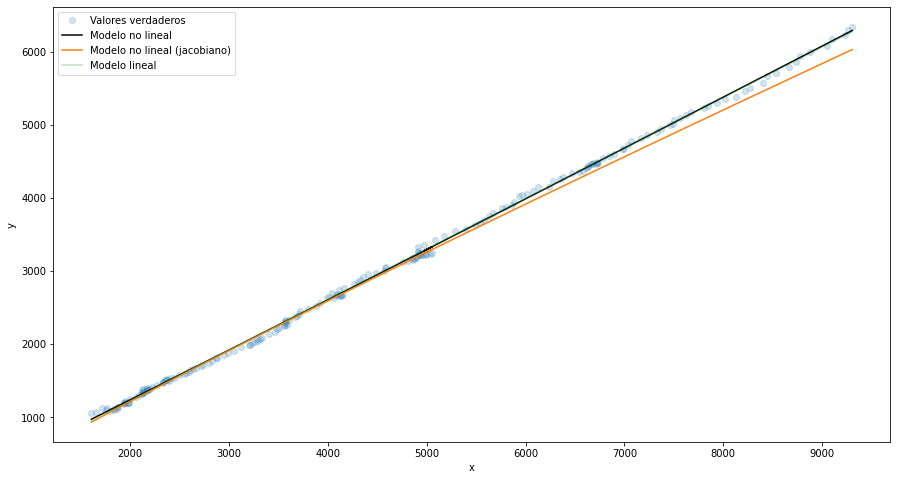

In [ ]:
# Optimizacion de modelos no lineales

np.random.seed(24) # semilla

## Ajustamos un modelo lineal

mod_lin = OLS(y, add_constant(X)).fit()
x0 = list(mod_lin.params[:])
x0.append(np.random.random())
# x0 = [ '%.1f' % elem for elem in x0 ] # parametros de inicio

## Optimizacion sin indicar el Jacobiano

def mod (b, x): # funcin del modelo
  return b[0] + b[1] * x ** b[2]

def coste (b, x, y): # funcion objetivo o de coste
  return mod(b, x) - y

res1 = least_squares(coste, x0, args=(X, y),verbose = 1) # estimamos los parametros 

## Optimizacion indicando el Jacobiano

def jac(b, x, y): # Matrix Jacobina
    J = np.empty((x.size, b.size))
    J[:, 0] = 1
    J[:, 1] = x ** b[2]
    J[:, 2] = x ** b[2] * np.log(b[2])
    return J

res2 = least_squares(coste, x0, jac=jac, args=(X, y), verbose=1) # estimamos los parametros 

# Graficando los modelos

fig, ax = plt.subplots(figsize = (15, 8))
plt.plot(X, y, 'o', label = 'Valores verdaderos', alpha = 0.2)
plt.plot(X, mod (res1.x, X), 'k', label = 'Modelo no lineal')
plt.plot(X, mod (res2.x, X), label = f'Modelo no lineal (jacobiano)')
plt.plot(X, mod_lin.predict(add_constant(X)), label = 'Modelo lineal', alpha = 0.3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Se puede observar que el metodo que se ajusta peor es el algoritmo que tiene el jacobiano, esto sucede por que la funcion es mas lineal que no lineal, a continuacion calculamos la matriz de varianza y covarianzas para ```mod1``` (modelo no lineal sin Jacobiano).

In [ ]:
def var_cov (jac, coste, y):
  '''
  Devuelve la matriz de varianza y covarianza

  jac = Matriz jacobiana
  coste = Sumatoria de residuos cuadrados
  y = Datos de la variable dependiente
  
  '''
  xx = np.linalg.inv(jac.T @ jac)
  src = coste / y.size
  cov =  xx * src
  return cov


var_cov (res1.jac, res1.cost, y) # corremos la funcion var_cov

array([[ 3.23129003e+02, -5.80658388e-01,  1.07411350e-01],
       [-5.80658388e-01,  1.10034737e-03, -2.04488247e-04],
       [ 1.07411350e-01, -2.04488247e-04,  3.80209171e-05]])

## Consideraciones

* La convergencia del algoritmo depende de los valores iniciales de los parametros, en el ejemplo anterior se inicializo el algoritmo con los parametros del modelo lineal y con un valor aleatorio para $\gamma$.
* Se necesita un criterio de convergencia el cual no debe ser mayor que el machine epsilon, el machine epsilon es la cantidad de decimales de precision de la computadora, con el modulo [Numpy](https://numpy.org/) usted puede obtener el machine epsilon corriendo el siguiente codigo ```print(np.finfo(float).eps)```.

Para el lector ansioso de màs teoria se aconseja leer la primera referencia, para el lector que quiera empezar econometria con Python se recomienda la tercera referencia, tambien se recomienda ampliamente el canal de [youtube](https://www.youtube.com/channel/UChWg-WNYrb-N9bJuDeKbdiw) del Ph.D A. Chumacero.

Se deja de tarea al lector realizar la intepretacion del modelo lineal como del modelo no lineal, efectos marginales.

## Referencias:
* William H. Greene, 2018, Econometric Analysis, edit. Pearson.
* [Rómulo A. Chumacero, 2012, Nonlinear Least Squares, Univ. de Chile.](http://rchumace.econ.uchile.cl/) 
* F. A. Triana Alarcòn, 2019, Guìa pràctica de econometrìa bàsica con Python, Univ. Nal. de Colombia.
* D. N. Gujarati y D. C. Porter, 2019, Econometrìa, edit. McGrawHill. 